In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Data taken from [Kaggle Tabular Playground Series](https://www.kaggle.com/c/tabular-playground-series-apr-2021)

## Read in Data

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
train_id = train["PassengerId"]
test_id = test["PassengerId"]

In [4]:
train.describe(include = "all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,100000.000000,100000.000000,100000.000000,100000,100000,96708.000000,100000.000000,100000.000000,95377,99866.00000,32134,99750
unique,NaN,NaN,NaN,92144,2,NaN,NaN,NaN,75331,NaN,26992,3
top,NaN,NaN,NaN,"Johnson, John",male,NaN,NaN,NaN,A/5,NaN,C19828,S
freq,NaN,NaN,NaN,31,56114,NaN,NaN,NaN,602,NaN,6,72139
mean,49999.500000,0.427740,2.106910,NaN,NaN,38.355472,0.397690,0.454560,NaN,43.92933,NaN,NaN
std,28867.657797,0.494753,0.837727,NaN,NaN,18.313556,0.862566,0.950076,NaN,69.58882,NaN,NaN
min,0.000000,0.000000,1.000000,NaN,NaN,0.080000,0.000000,0.000000,NaN,0.68000,NaN,NaN
25%,24999.750000,0.000000,1.000000,NaN,NaN,25.000000,0.000000,0.000000,NaN,10.04000,NaN,NaN
50%,49999.500000,0.000000,2.000000,NaN,NaN,39.000000,0.000000,0.000000,NaN,24.46000,NaN,NaN
75%,74999.250000,1.000000,3.000000,NaN,NaN,53.000000,1.000000,1.000000,NaN,33.50000,NaN,NaN


In [5]:
test.describe(include = "all")

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,100000.000000,100000.000000,100000,100000,96513.000000,100000.000000,100000.00000,94819,99867.000000,29169,99723
unique,NaN,NaN,90808,2,NaN,NaN,NaN,75432,NaN,25216,3
top,NaN,NaN,"Smith, James",male,NaN,NaN,NaN,SC/PARIS,NaN,B13288,S
freq,NaN,NaN,37,69757,NaN,NaN,NaN,163,NaN,5,68842
mean,149999.500000,2.368930,NaN,NaN,30.565796,0.486550,0.49283,NaN,45.374804,NaN,NaN
std,28867.657797,0.878458,NaN,NaN,14.054634,0.771262,0.92360,NaN,65.204725,NaN,NaN
min,100000.000000,1.000000,NaN,NaN,0.080000,0.000000,0.00000,NaN,0.050000,NaN,NaN
25%,124999.750000,1.000000,NaN,NaN,21.000000,0.000000,0.00000,NaN,10.130000,NaN,NaN
50%,149999.500000,3.000000,NaN,NaN,27.000000,0.000000,0.00000,NaN,13.980000,NaN,NaN
75%,174999.250000,3.000000,NaN,NaN,40.000000,1.000000,1.00000,NaN,37.390000,NaN,NaN


In [6]:
percent_train_missing = train.isna().sum() / 100000
print(percent_train_missing)

PassengerId    0.00000
Survived       0.00000
Pclass         0.00000
Name           0.00000
Sex            0.00000
Age            0.03292
SibSp          0.00000
Parch          0.00000
Ticket         0.04623
Fare           0.00134
Cabin          0.67866
Embarked       0.00250
dtype: float64


In [7]:
percent_test_missing = test.isna().sum() / 100000
print(percent_test_missing)

PassengerId    0.00000
Pclass         0.00000
Name           0.00000
Sex            0.00000
Age            0.03487
SibSp          0.00000
Parch          0.00000
Ticket         0.05181
Fare           0.00133
Cabin          0.70831
Embarked       0.00277
dtype: float64


Cabin is missing a majority of the observations so we will drop Cabin. Also drop PassengerId since it is not important and we saved the values already to use later.

In [8]:
train.drop(["Cabin", "PassengerId"], axis = 1, inplace = True)
test.drop(["Cabin", "PassengerId"], axis = 1, inplace = True)

In [9]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,S
1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,S
2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,S
3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,S
4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,S


In [10]:
train["family_size"] = train["SibSp"] + train["Parch"]
test["family_size"] = test["SibSp"] + test["Parch"]

train.drop("Name", axis = 1, inplace = True)
test.drop("Name", axis = 1, inplace = True)

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Survived     100000 non-null  int64  
 1   Pclass       100000 non-null  int64  
 2   Sex          100000 non-null  object 
 3   Age          96708 non-null   float64
 4   SibSp        100000 non-null  int64  
 5   Parch        100000 non-null  int64  
 6   Ticket       95377 non-null   object 
 7   Fare         99866 non-null   float64
 8   Embarked     99750 non-null   object 
 9   family_size  100000 non-null  int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 7.6+ MB


## Data Exploration

Goal is to clean missing data.

<AxesSubplot:xlabel='Age', ylabel='Count'>

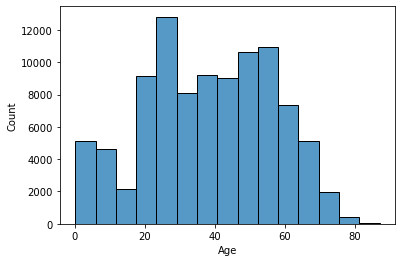

In [12]:
sns.histplot(x = train["Age"], bins = 15)

We will impute with the median of Age later once we start modeling.

In [13]:
train["Ticket"]

0           209245
1            27323
2        CA 457703
3         A. 10866
4           427635
           ...    
99995     PC 15008
99996        13273
99997          NaN
99998       458654
99999       458074
Name: Ticket, Length: 100000, dtype: object

Ticket does not seem like it shows much useful information so we will drop it.

In [14]:
train.drop("Ticket", axis = 1, inplace = True)
test.drop("Ticket", axis = 1, inplace = True)

<AxesSubplot:xlabel='Embarked', ylabel='count'>

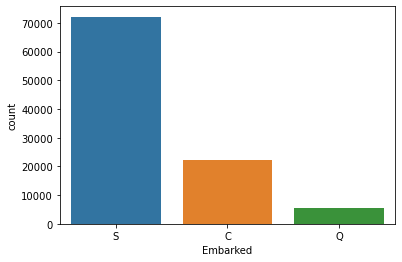

In [15]:
sns.countplot(x = train["Embarked"])

We will impute missing values of Embarked using the most frequent class and sklearn.

<AxesSubplot:xlabel='Fare', ylabel='Count'>

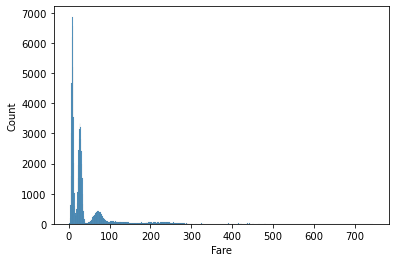

In [16]:
sns.histplot(x = train["Fare"])

Also impute these values with the median.

## Modeling

In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Survived     100000 non-null  int64  
 1   Pclass       100000 non-null  int64  
 2   Sex          100000 non-null  object 
 3   Age          96708 non-null   float64
 4   SibSp        100000 non-null  int64  
 5   Parch        100000 non-null  int64  
 6   Fare         99866 non-null   float64
 7   Embarked     99750 non-null   object 
 8   family_size  100000 non-null  int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 6.9+ MB


In [18]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.compose import ColumnTransformer
from xgboost import XGBClassifier

In [19]:
X = train.drop("Survived", axis = 1)
y = train["Survived"]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [20]:
cat_preprocess = Pipeline([
    ("imputer_cat", SimpleImputer(strategy = "most_frequent")),
    ("one_hot", OneHotEncoder())
])

preprocessor = ColumnTransformer([
    ("impute_numeric", SimpleImputer(strategy = "median"), ["Age", "Fare"]),
    ("cat", cat_preprocess, ["Embarked", "Sex"])
])

In [21]:
pipeline = Pipeline([
    ("preprocess", preprocessor),
    ("model", XGBClassifier(tree_method = "gpu_hist", gpu_id = 0))
])

In [22]:
XGBClassifier().get_params().keys()

dict_keys(['objective', 'use_label_encoder', 'base_score', 'booster', 'colsample_bylevel', 'colsample_bynode', 'colsample_bytree', 'gamma', 'gpu_id', 'importance_type', 'interaction_constraints', 'learning_rate', 'max_delta_step', 'max_depth', 'min_child_weight', 'missing', 'monotone_constraints', 'n_estimators', 'n_jobs', 'num_parallel_tree', 'random_state', 'reg_alpha', 'reg_lambda', 'scale_pos_weight', 'subsample', 'tree_method', 'validate_parameters', 'verbosity'])

In [23]:
xgboost_grid = {
    "model__n_estimators": [100, 250, 500],
    "model__max_depth": [3, 4, 5, 6],
    "model__learning_rate": [0.1, 0.05, 0.01],
    "model__subsample": [0.8, 0.9, 1],
    "model__colsample_bytree": [0.8, 0.9, 1],
    "model__gamma": [0, 1, 5],
    "model__use_label_encoder": [False],
    "model__eval_metric": ["logloss"]
}

In [24]:
clf = GridSearchCV(pipeline, param_grid = xgboost_grid, cv = 3)

In [25]:
clf

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('impute_numeric',
                                                                         SimpleImputer(strategy='median'),
                                                                         ['Age',
                                                                          'Fare']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer_cat',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('one_hot',
                                                                                          OneHotEncoder())]),
                                    

In [26]:
clf.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('impute_numeric',
                                                                         SimpleImputer(strategy='median'),
                                                                         ['Age',
                                                                          'Fare']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer_cat',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('one_hot',
                                                                                          OneHotEncoder())]),
                                    

In [27]:
clf.best_params_

{'model__colsample_bytree': 1,
 'model__eval_metric': 'logloss',
 'model__gamma': 1,
 'model__learning_rate': 0.05,
 'model__max_depth': 5,
 'model__n_estimators': 100,
 'model__subsample': 0.8,
 'model__use_label_encoder': False}

In [28]:
y_val_preds = clf.predict(X_val)

In [29]:
accuracy_score(y_val, y_val_preds)

0.7662727272727273

In [30]:
print(confusion_matrix(y_val, y_val_preds))

[[14499  4446]
 [ 3267 10788]]


In [31]:
print(classification_report(y_val, y_val_preds))

              precision    recall  f1-score   support

           0       0.82      0.77      0.79     18945
           1       0.71      0.77      0.74     14055

    accuracy                           0.77     33000
   macro avg       0.76      0.77      0.76     33000
weighted avg       0.77      0.77      0.77     33000



In [32]:
test_preds = clf.predict(test)
print(test_preds)

[0 1 1 ... 0 1 1]


In [33]:
output_submission = pd.DataFrame({"PassengerId": test_id, "Survived": test_preds})
print(output_submission)

       PassengerId  Survived
0           100000         0
1           100001         1
2           100002         1
3           100003         0
4           100004         1
...            ...       ...
99995       199995         1
99996       199996         0
99997       199997         0
99998       199998         1
99999       199999         1

[100000 rows x 2 columns]


In [34]:
output_submission.to_csv("xgboost_submission.csv")